<div style="width:100%; height: 100px; color: yellow; background-color: #373435; font-size: 36px; text-align: center; line-height: 100px; border-radius: 8px">McDonald's Store Reviews</div>

![mc](mc.jpg)

<div id= "table-of-contents" style= "font-size: 22px; font-weight: bold">Table of Contents</div>

<p style= "font-size: 16px">1. <a href= "#prologue" style= "text-decoration: none; font-size: 16px">Prologue</a><p/>
<p style= "font-size: 16px">2. <a href= "#import-libraries" style= "text-decoration: none; font-size: 16px">Importing Libraries</a><p/>
<p style= "font-size: 16px">3. <a href= "#data-pre" style= "text-decoration: none; font-size: 16px">Data Preprocessing</a><p/>
<p style= "font-size: 16px">4. <a href= "#sentiment-analysis" style= "text-decoration: none; font-size: 16px">Sentiment Analysis</a><p/>
<p style= "font-size: 16px">5. <a href= "#data-visualize" style= "text-decoration: none; font-size: 16px">Data Visualization</a><p/>
<p style= "font-size: 16px">6. <a href= "#conclusion" style= "text-decoration: none; font-size: 16px">Conclusion and Future Work</a><p/>
<p style= "font-size: 16px">7. <a href= "#reference" style= "text-decoration: none; font-size: 16px">Reference</a><p/>

<div id= "prologue" style= "font-size: 22px; font-weight: bold">Prologue</div>

<a href= "#table-of-contents" style= "text-decoration: none; font-size: 14px">Back to Top</a>

<p style= "font-size: 16px">Customer reviews are a valuable source of information that can provide insights into the perceptions and experiences of patrons at various establishments. In the context of the fast-food industry, understanding customer sentiments can be particularly crucial for businesses striving to enhance their offerings and customer satisfaction. One such iconic fast-food chain that has garnered a vast repository of customer reviews is McDonald's. In this exploration, we delve into the world of McDonald's US store reviews, with the aim of unraveling the stories hidden within this wealth of feedback.</p> 
<p style= "font-size: 18px; font-weight: bold">Dataset: McDonald's US Store Reviews</p>
<p style= "font-size: 16px">The McDonald's US Store Review Dataset is a comprehensive collection of customer reviews, spanning a multitude of locations across the United States. This dataset offers a unique opportunity to gain insights into the preferences, experiences, and sentiments of McDonald's patrons. It consists of a diverse range of data, including review text, geographic information such as latitude and longitude, and star ratings on a scale of 1 to 5.</p> 
<p style= "font-size: 16px">You can access the dataset <a href="https://www.kaggle.com/datasets/nelgiriyewithana/mcdonalds-store-reviews/data?select=McDonald_s_Reviews.csv"> here</a>.</p>

<div id= "import-libraries" style= "font-size: 22px; font-weight: bold">Importing Libraries</div>

<a href= "#table-of-contents" style= "text-decoration: none; font-size: 14px">Back to Top</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud 

import time

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

<div id= "data-pre" style= "font-size: 22px; font-weight: bold">Data Preprocessing</div>

<a href= "#table-of-contents" style= "text-decoration: none; font-size: 14px">Back to Top</a>

In [2]:
df = pd.read_csv('Mc_reviews.csv', encoding = 'latin-1')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewer_id    33396 non-null  int64  
 1   store_name     33396 non-null  object 
 2   category       33396 non-null  object 
 3   store_address  33396 non-null  object 
 4   latitude       32736 non-null  float64
 5   longitude      32736 non-null  float64
 6   rating_count   33396 non-null  object 
 7   review_time    33396 non-null  object 
 8   review         33396 non-null  object 
 9   rating         33396 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.5+ MB


This dataset consists of 33396 entries, indexed from 0 to 33395

Data columns (total 10 columns):
- reviewer_id: The unique id of each reviewer (we don't need this column as well).
- store_name: McDonald's. It has 2 unique values that must be found out to handle.
- category: Only one unique value (Fast food restaurant).
- store_address: Address of each restaurant in the United States (40 unique values - we will handle it later).
- latitude: latitude of each restaurant (660 missing values).
- longitude: longitude of each restaurant (660 missing values).
- rating_count: rating count of each restaurant (we will not touch this column, the values count of each restaurant doesn't match the rating count).
- review_time: Time period for customer review up to now. It maybe helpful to know how the restaurant has changed over time. 
- review: review of customer to the restaurant (their experience).
- rating: rating stars the customers give to the restaurant.  

In [4]:
df.head()

reviewer_id  store_name              category  \
0            1  McDonald's  Fast food restaurant   
1            2  McDonald's  Fast food restaurant   
2            3  McDonald's  Fast food restaurant   
3            4  McDonald's  Fast food restaurant   
4            5  McDonald's  Fast food restaurant   

                                       store_address  latitude   longitude  \
0  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
1  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
2  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
3  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
4  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   

  rating_count   review_time  \
0        1,240  3 months ago   
1        1,240    5 days ago   
2        1,240    5 days ago   
3        1,240   a month ago   
4        1,240  2 months ago   

                                              review   rating  
0  Why does it look like someone spit on my food?...   1 star  
1  It'd McDonalds. It is what it is as far as the...  4 stars  
2  Made a mobile order got to the speaker and che...   1 star  
3  My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...  5 stars  
4  I repeat my order 3 times in the drive thru, a...   1 star

In [5]:
df.columns

Index(['reviewer_id', 'store_name', 'category', 'store_address', 'latitude ',
       'longitude', 'rating_count', 'review_time', 'review', 'rating'],
      dtype='object')

In [6]:
df.columns = df.columns.str.strip()

In [7]:
for i in df.columns:
    n = df[i].nunique()
    if n > 1:
        print(f"{i} has {n} unique values")
    else:
        print(f"{i} has {n} unique value")

reviewer_id has 33396 unique values
store_name has 2 unique values
category has 1 unique value
store_address has 40 unique values
latitude has 39 unique values
longitude has 39 unique values
rating_count has 51 unique values
review_time has 39 unique values
review has 22285 unique values
rating has 5 unique values


In [8]:
df['store_name'].unique()

array(["McDonald's", "ýýýMcDonald's"], dtype=object)

In [9]:
df = df.replace("ýýýMcDonald's", "McDonald's")

In [10]:
df['store_address'].unique()

array(['13749 US-183 Hwy, Austin, TX 78750, United States',
       '1698 US-209, Brodheadsville, PA 18322, United States',
       '72-69 Kissena Blvd, Queens, NY 11367, United States',
       '429 7th Ave, New York, NY 10001, United States',
       '724 Broadway, New York, NY 10003, United States',
       '160 Broadway, New York, NY 10038, United States',
       '555 13th St NW, Washington, DC 20004, United States',
       '10451 Santa Monica Blvd, Los Angeles, CA 90025, United States',
       '114 Delancey St, New York, NY 10002, United States',
       '5920 Balboa Ave, San Diego, CA 92111, United States',
       '262 Canal St, New York, NY 10013, United States',
       '490 8th Ave, New York, NY 10001, United States',
       '550 Lawrence Expy, Sunnyvale, CA 94086, United States',
       '11382 US-441, Orlando, FL 32837, United States',
       '210 5th S, Salt Lake City, UT 84106, United States',
       '1916 M St NW, Washington, DC 20036, United States',
       "151 West 34th Street

In [11]:
n = df[df['store_address'] == '2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½'].index.to_list()
df.iloc[n]

reviewer_id  store_name              category  \
22141        22142  McDonald's  Fast food restaurant   
22142        22143  McDonald's  Fast food restaurant   
22143        22144  McDonald's  Fast food restaurant   
22144        22145  McDonald's  Fast food restaurant   
22145        22146  McDonald's  Fast food restaurant   
...            ...         ...                   ...   
27719        27720  McDonald's  Fast food restaurant   
27720        27721  McDonald's  Fast food restaurant   
27721        27722  McDonald's  Fast food restaurant   
27722        27723  McDonald's  Fast food restaurant   
27723        27724  McDonald's  Fast food restaurant   

                                           store_address  latitude  longitude  \
22141  2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...       NaN        NaN   
22142  2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...       NaN        NaN   
22143  2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...       NaN        NaN   
22144  2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...       NaN        NaN   
22145  2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...       NaN        NaN   
...                                                  ...       ...        ...   
27719  2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...       NaN        NaN   
27720  2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...       NaN        NaN   
27721  2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...       NaN        NaN   
27722  2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...       NaN        NaN   
27723  2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...       NaN        NaN   

      rating_count    review_time  \
22141        2,175   3 months ago   
22142        2,175     a year ago   
22143        2,175    2 weeks ago   
22144        2,175    a month ago   
22145        2,175   2 months ago   
...            ...            ...   
27719        2,175    3 years ago   
27720        2,175  11 months ago   
27721        2,175  11 months ago   
27722        2,175  11 months ago   
27723        2,175   8 months ago   

                                                  review   rating  
22141  Breakfast specials are good. The sausage burri...  4 stars  
22142  This isn't your typical McDonald's. This place...  5 stars  
22143  This place was serving good quality breakfast ...  4 stars  
22144  I understand this is a very busy location but ...   1 star  
22145  When I arrived at McDonald's, it was very crow...  4 stars  
...                                                  ...      ...  
27719  This McDonald's is across the street from Waik...  5 stars  
27720  Seems like, they always makes some mistakes wh...  2 stars  
27721  Convenient to the east end of Kalakaua Ave. Lo...  4 stars  
27722  Lost McDonald's in Honolulu, if you can avoid ...   1 star  
27723  Everytime I visit Waikiki for a vacation this ...   1 star  

[660 rows x 10 columns]

The wrong address of the restaurant leads to the failure to identify the latitude and longitude of the restaurant. Maybe we can find out the real address of this restaurant and then using <a href="https://www.latlong.net/">this</a> to find lat and long

In [12]:
df.iloc[27723]['review']

'Everytime I visit Waikiki for a vacation this mc Donaldï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½s milksha'

Oh great, we can search up the McDonald's restaurant located in Waikiki 

In [13]:
df = df.replace("2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½", "2476 Kalakaua Ave Honolulu, HI 96815, United States")
df['latitude'] = df['latitude'].fillna(21.274680)
df['longitude'] = df['longitude'].fillna(-157.824120)

In [14]:
df.iloc[n].head()

reviewer_id  store_name              category  \
22141        22142  McDonald's  Fast food restaurant   
22142        22143  McDonald's  Fast food restaurant   
22143        22144  McDonald's  Fast food restaurant   
22144        22145  McDonald's  Fast food restaurant   
22145        22146  McDonald's  Fast food restaurant   

                                           store_address  latitude  longitude  \
22141  2476 Kalakaua Ave Honolulu, HI 96815, United S...  21.27468 -157.82412   
22142  2476 Kalakaua Ave Honolulu, HI 96815, United S...  21.27468 -157.82412   
22143  2476 Kalakaua Ave Honolulu, HI 96815, United S...  21.27468 -157.82412   
22144  2476 Kalakaua Ave Honolulu, HI 96815, United S...  21.27468 -157.82412   
22145  2476 Kalakaua Ave Honolulu, HI 96815, United S...  21.27468 -157.82412   

      rating_count   review_time  \
22141        2,175  3 months ago   
22142        2,175    a year ago   
22143        2,175   2 weeks ago   
22144        2,175   a month ago   
22145        2,175  2 months ago   

                                                  review   rating  
22141  Breakfast specials are good. The sausage burri...  4 stars  
22142  This isn't your typical McDonald's. This place...  5 stars  
22143  This place was serving good quality breakfast ...  4 stars  
22144  I understand this is a very busy location but ...   1 star  
22145  When I arrived at McDonald's, it was very crow...  4 stars

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewer_id    33396 non-null  int64  
 1   store_name     33396 non-null  object 
 2   category       33396 non-null  object 
 3   store_address  33396 non-null  object 
 4   latitude       33396 non-null  float64
 5   longitude      33396 non-null  float64
 6   rating_count   33396 non-null  object 
 7   review_time    33396 non-null  object 
 8   review         33396 non-null  object 
 9   rating         33396 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.5+ MB


Nice, as I expected. Now we don't have any mising values. Let's preprocess the review text to prepare for our sentiment analysis

In [16]:
def clean_text(text):
    cleaned_text = text.str.replace('[^a-zA-Z0-9]', ' ', regex=True)
    return cleaned_text
df['review'] = clean_text(df['review'])

In [17]:
df['rating'].unique()

array(['1 star', '4 stars', '5 stars', '2 stars', '3 stars'], dtype=object)

In [18]:
map_rating = {'1 star': 1, '2 stars': 2, '3 stars': 3, '4 stars': 4, '5 stars': 5}
df['rating'] = df['rating'].map(map_rating)

In [19]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
df['review'] = df['review'].str.lower()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN 
def preprocess_text(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    pos_tags = nltk.pos_tag(filtered_tokens)
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]
    
    return ' '.join(lemmatized_tokens)

In [21]:
df['cleaned_review'] = df['review'].apply(preprocess_text)
df.head()

reviewer_id  store_name              category  \
0            1  McDonald's  Fast food restaurant   
1            2  McDonald's  Fast food restaurant   
2            3  McDonald's  Fast food restaurant   
3            4  McDonald's  Fast food restaurant   
4            5  McDonald's  Fast food restaurant   

                                       store_address   latitude  longitude  \
0  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
1  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
2  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
3  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
4  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   

  rating_count   review_time  \
0        1,240  3 months ago   
1        1,240    5 days ago   
2        1,240    5 days ago   
3        1,240   a month ago   
4        1,240  2 months ago   

                                              review  rating  \
0  why does it look like someone spit on my food ...       1   
1  it d mcdonalds  it is what it is as far as the...       4   
2  made a mobile order got to the speaker and che...       1   
3  my mc  crispy chicken sandwich was            ...       5   
4  i repeat my order 3 times in the drive thru  a...       1   

                                      cleaned_review  
0  look like someone spit food normal transaction...  
1  mcdonalds far food atmosphere go staff make di...  
2  make mobile order get speaker check line move ...  
3  mc crispy chicken sandwich customer service qu...  
4  repeat order 3 time drive thru still manage me...

<div id= "sentiment-analysis" style= "font-size: 22px; font-weight: bold">Sentiment Analysis</div>

<a href= "#table-of-contents" style= "text-decoration: none; font-size: 14px">Back to Top</a>

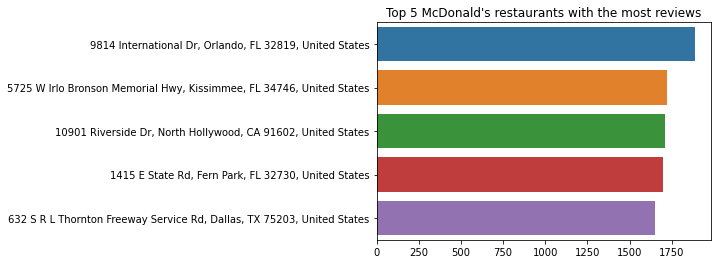

In [22]:
store_df = df['store_address'].value_counts().head()
sns.barplot(y = store_df.index, x = store_df.values)
plt.title("Top 5 McDonald's restaurants with the most reviews");

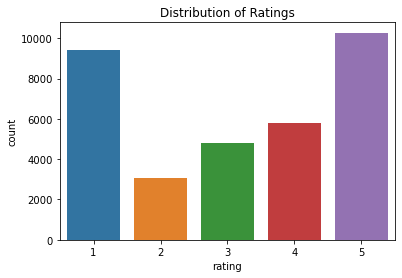

In [23]:
sns.countplot(x = df['rating'], order=[1, 2, 3, 4, 5])
plt.title("Distribution of Ratings");

### Sentiment varied by rating

In [24]:
df2 = df.filter(['cleaned_review', 'rating'])
def sentiment_by_rating(x):
    if x > 3:
        return 1 #positive
    elif x < 3:
        return -1 #negative
    else:
        return 0 #neutral
df2['sentiment'] = df2['rating'].apply(sentiment_by_rating)
df2.head()

cleaned_review  rating  sentiment
0  look like someone spit food normal transaction...       1         -1
1  mcdonalds far food atmosphere go staff make di...       4          1
2  make mobile order get speaker check line move ...       1         -1
3  mc crispy chicken sandwich customer service qu...       5          1
4  repeat order 3 time drive thru still manage me...       1         -1

In [25]:
data_pie = df2['sentiment'].value_counts()
px.pie(values = data_pie.values, names= ['Positive', 'Negative', 'Neutral'], 
       title= 'Distribution of sentiment varied by rating')

In [26]:
X = df2['cleaned_review']
y = df2['sentiment']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print("Length of features in TF-IDF matrix:", len(vectorizer.get_feature_names_out()))

Length of features in TF-IDF matrix: 10719


In [28]:
models = [
    ("MultinomialNB", MultinomialNB()),
    ("SVC", SVC(random_state= 42)),
    ("RandomForestClassifier", RandomForestClassifier(random_state= 42))
]

In [29]:
def modeling(model):
    start = time.time()
    classifier = model
    classifier.fit(X_train, y_train)

    # Predict sentiment on the test set
    y_pred = classifier.predict(X_test)

    # Evaluate model performance
    accuracy = accuracy_score(y_test, y_pred)
    finish = time.time() - start
    report = classification_report(y_test, y_pred)
    print("Run time:", finish)
    print('Accuracy:', accuracy)
    print(report)
    print("-"*53)

In [30]:
for name, model in models:
    print("Model:", name)
    modeling(model)

Model: MultinomialNB
Run time: 0.016441822052001953
Accuracy: 0.7964071856287425
              precision    recall  f1-score   support

          -1       0.77      0.90      0.83      2543
           0       0.96      0.20      0.33       939
           1       0.81      0.89      0.85      3198

    accuracy                           0.80      6680
   macro avg       0.85      0.66      0.67      6680
weighted avg       0.82      0.80      0.77      6680

-----------------------------------------------------
Model: SVC
Run time: 266.68631076812744
Accuracy: 0.8330838323353293
              precision    recall  f1-score   support

          -1       0.83      0.90      0.86      2543
           0       0.78      0.37      0.50       939
           1       0.84      0.91      0.88      3198

    accuracy                           0.83      6680
   macro avg       0.82      0.73      0.75      6680
weighted avg       0.83      0.83      0.82      6680

----------------------------------

1. Multinomial Naive Bayes:

- Run time: 0.016 seconds
- Accuracy: 0.796 (79.6%)
- Precision, Recall, and F1-score:
    - Class -1: Precision 0.77, Recall 0.90, F1-score 0.83
    - Class 0: Precision 0.96, Recall 0.20, F1-score 0.33
    - Class 1: Precision 0.81, Recall 0.89, F1-score 0.85
- Overall, the model has good accuracy but has some issues with class 0, where the recall is relatively low.
2. Support Vector Classifier (SVC):

- Run time: 266.686 seconds
- Accuracy: 0.833 (83.3%)
- Precision, Recall, and F1-score:
    - Class -1: Precision 0.83, Recall 0.90, F1-score 0.86
    - Class 0: Precision 0.78, Recall 0.37, F1-score 0.50
    - Class 1: Precision 0.84, Recall 0.91, F1-score 0.88
- This model has a higher accuracy than Multinomial Naive Bayes, especially for class 0. However, it has a significantly longer run time.
3. Random Forest Classifier:

- Run time: 208.756 seconds
- Accuracy: 0.831 (83.1%)
- Precision, Recall, and F1-score:
    - Class -1: Precision 0.82, Recall 0.90, F1-score 0.86
    - Class 0: Precision 0.79, Recall 0.40, F1-score 0.53
    - Class 1: Precision 0.85, Recall 0.90, F1-score 0.87
- Similar to the SVC, this model also has a higher accuracy compared to Multinomial Naive Bayes, with a trade-off in terms of run time. The recall for class 0 is still relatively low.

In terms of accuracy, the Support Vector Classifier (SVC) and the Random Forest Classifier perform better than the Multinomial Naive Bayes model. However, they have longer run times. 

#### Let's try reduce the dimension by set min_df for TfidfVectorizer

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(min_df = 4)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print("Length of features in TF-IDF matrix:", len(vectorizer.get_feature_names_out()))

Length of features in TF-IDF matrix: 3681


In [32]:
for name, model in models:
    print("Model:", name)
    modeling(model)

Model: MultinomialNB
Run time: 0.02099323272705078
Accuracy: 0.7971556886227545
              precision    recall  f1-score   support

          -1       0.77      0.89      0.83      2543
           0       0.93      0.22      0.35       939
           1       0.81      0.89      0.85      3198

    accuracy                           0.80      6680
   macro avg       0.84      0.67      0.68      6680
weighted avg       0.81      0.80      0.77      6680

-----------------------------------------------------
Model: SVC
Run time: 242.98838686943054
Accuracy: 0.8306886227544911
              precision    recall  f1-score   support

          -1       0.82      0.90      0.86      2543
           0       0.75      0.39      0.51       939
           1       0.85      0.91      0.88      3198

    accuracy                           0.83      6680
   macro avg       0.81      0.73      0.75      6680
weighted avg       0.82      0.83      0.82      6680

-----------------------------------

1. Multinomial Naive Bayes:

- Run time: 0.021 seconds
- Accuracy: 0.797 (79.7%)
- Precision, Recall, and F1-score:
    - Class -1: Precision 0.77, Recall 0.89, F1-score 0.83
    - Class 0: Precision 0.93, Recall 0.22, F1-score 0.35
    - Class 1: Precision 0.81, Recall 0.89, F1-score 0.85

- The accuracy is similar to the previous Multinomial Naive Bayes model, and the run time remains low. However, class 0's recall has improved slightly.
2. Support Vector Classifier (SVC):

- Run time: 242.988 seconds
- Accuracy: 0.831 (83.1%)
- Precision, Recall, and F1-score:
    - Class -1: Precision 0.82, Recall 0.90, F1-score 0.86
    - Class 0: Precision 0.75, Recall 0.39, F1-score 0.51
    - Class 1: Precision 0.85, Recall 0.91, F1-score 0.88

- The accuracy and recall values are similar to the previous SVC model, but the run time is still high.
3. Random Forest Classifier:

- Run time: 120.050 seconds
- Accuracy: 0.831 (83.1%)
- Precision, Recall, and F1-score:
    - Class -1: Precision 0.82, Recall 0.91, F1-score 0.86
    - Class 0: Precision 0.77, Recall 0.40, F1-score 0.53
    - Class 1: Precision 0.85, Recall 0.90, F1-score 0.87

- Similar to the previous Random Forest Classifier model, this one also maintains a high accuracy with improved recall for class 0.

Reducing the feature dimension with min_df didn't have a significant impact on the model's performance. The trade-offs between accuracy and run time for each model remain consistent with the previous results. It seems that the three models perform similarly with the reduced feature dimension but with less time.

#### We can use this strategy for our next work

### Sentiment using TextBlob

In [26]:
df3 = df.filter(['cleaned_review'])
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 1 #positive
    elif analysis.sentiment.polarity < 0:
        return -1 #negative
    else:
        return 0 #neutral

df3['sentiment'] = df3['cleaned_review'].apply(get_sentiment)
df3.head()

cleaned_review  sentiment
0  look like someone spit food normal transaction...          1
1  mcdonalds far food atmosphere go staff make di...          1
2  make mobile order get speaker check line move ...         -1
3  mc crispy chicken sandwich customer service qu...         -1
4  repeat order 3 time drive thru still manage me...         -1

In [142]:
data_pie2 = df3['sentiment'].value_counts()
px.pie(values = data_pie2.values, names= ['Positive', 'Negative', 'Neutral'], title= 'Distribution of sentiment using TextBlob')

In [27]:
X = df3['cleaned_review']
y = df3['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(min_df= 4)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print("Length of features in TF-IDF matrix:", len(vectorizer.get_feature_names_out()))

Length of features in TF-IDF matrix: 3681


In [35]:
for name, model in models:
    print("Model:", name)
    modeling(model)

Model: MultinomialNB
Run time: 0.0242307186126709
Accuracy: 0.8143712574850299
              precision    recall  f1-score   support

          -1       0.80      0.83      0.81      1852
           0       0.95      0.30      0.46       970
           1       0.81      0.94      0.87      3858

    accuracy                           0.81      6680
   macro avg       0.85      0.69      0.71      6680
weighted avg       0.83      0.81      0.79      6680

-----------------------------------------------------
Model: SVC
Run time: 206.10507488250732
Accuracy: 0.9573353293413174
              precision    recall  f1-score   support

          -1       0.95      0.93      0.94      1852
           0       0.94      0.95      0.95       970
           1       0.97      0.97      0.97      3858

    accuracy                           0.96      6680
   macro avg       0.95      0.95      0.95      6680
weighted avg       0.96      0.96      0.96      6680

------------------------------------

1. Multinomial Naive Bayes:

- Run time: 0.024 seconds
- Accuracy: 0.814 (81.4%)
- Precision, Recall, and F1-score:
    - Class -1: Precision 0.80, Recall 0.83, F1-score 0.81
    - Class 0: Precision 0.95, Recall 0.30, F1-score 0.46
    - Class 1: Precision 0.81, Recall 0.94, F1-score 0.87
- The Multinomial Naive Bayes model achieved decent accuracy, but it appears to struggle with class 0, where the recall is relatively low.
2. Support Vector Classifier (SVC):

- Run time: 206.105 seconds
- Accuracy: 0.957 (95.7%)
- Precision, Recall, and F1-score:
    - Class -1: Precision 0.95, Recall 0.93, F1-score 0.94
    - Class 0: Precision 0.94, Recall 0.95, F1-score 0.95
    - Class 1: Precision 0.97, Recall 0.97, F1-score 0.97
- The SVC model achieved high accuracy and strong performance in terms of precision, recall, and F1-score for all classes. However, the run time is considerably longer.
3. Random Forest Classifier:

- Run time: 67.024 seconds
- Accuracy: 0.937 (93.7%)
- Precision, Recall, and F1-score:
    - Class -1: Precision 0.92, Recall 0.90, F1-score 0.91
    - Class 0: Precision 0.92, Recall 0.92, F1-score 0.92
    - Class 1: Precision 0.95, Recall 0.96, F1-score 0.95
- The Random Forest Classifier achieved a high accuracy with a good balance of precision, recall, and F1-score for all classes. It also has a reasonable run time.

In this case, both the Support Vector Classifier (SVC) and the Random Forest Classifier outperform the Multinomial Naive Bayes model in terms of accuracy and overall performance. 

#### In my opinion, Random Forest Classifier has better performance. The trade-off between accuracy and run time of Random Forest is much better. If Random Forest performs really well in this dataset, how about trying Decision Tree?

In [36]:
start = time.time()
classifier = DecisionTreeClassifier(random_state= 42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
finish = time.time() - start
report = classification_report(y_test, y_pred)
print("Run time:", finish)
print('Accuracy:', accuracy)
print(report)
print("-"*53)

Run time: 4.372748136520386
Accuracy: 0.9456586826347305
              precision    recall  f1-score   support

          -1       0.92      0.90      0.91      1852
           0       0.96      0.97      0.96       970
           1       0.96      0.96      0.96      3858

    accuracy                           0.95      6680
   macro avg       0.94      0.94      0.94      6680
weighted avg       0.95      0.95      0.95      6680

-----------------------------------------------------


Wow, Decision Tree Classifier fits well into this dataset. We should use Decesion tree model as a sentiment prediction function to enhance usability

In [37]:
def map_sentiment(sentiment_label):
    sentiment_mapping = {
        -1: "Negative",
        0: "Neutral",
        1: "Positive"
    }
    return sentiment_mapping.get(sentiment_label)
def predict_sentiment(review):
    review_tfidf = vectorizer.transform([review])
    sentiment_label = classifier.predict(review_tfidf)[0]
    sentiment_word = map_sentiment(sentiment_label)
    print("Predicted sentiment:", sentiment_word)

In [38]:
predict_sentiment("This is awesome")

Predicted sentiment: Positive


#### Cool, we can build a basic dash app.

In [39]:
from dash import Dash, dcc, html, Input, Output

app = Dash(__name__)

app.layout = html.Div([
    html.H1("Sentiment Analysis Dashboard"),
    dcc.Textarea(id='input-review', placeholder='Enter a review...', rows=4, style={'width': '410px', 'border-radius': '8px',
                                                                                   'border': '1px solid #424874'}),
    html.Div(id='output-sentiment', style= {'text-align': 'start', 'width': '100%', 'margin': '10px 0px 0px 33px'})],
    style= {'width': '450px', 'height': '250px', 'padding': '10px', 'background-color': '#DCD6F7', 'display': 'flex',
           'flex-direction': 'column', 'align-items': 'center', 'border-radius': '16px', 'color': '#424874', 
            'border': '2px solid #424874'}
)

@app.callback(
    Output('output-sentiment', 'children'),
    Input('input-review', 'value')
)
def update_sentiment(input_review):
    if input_review:
        review_tfidf = vectorizer.transform([input_review])
        sentiment_label = classifier.predict(review_tfidf)[0]
        sentiment_word = map_sentiment(sentiment_label)
        return f"Predicted sentiment: {sentiment_word}"
    else:
        return ""

if __name__ == '__main__':
    app.run_server(debug=False)

<div id= "data-visualize" style= "font-size: 22px; font-weight: bold">Data Visualization</div>

<a href= "#table-of-contents" style= "text-decoration: none; font-size: 14px">Back to Top</a>

In [82]:
text_ne = ' '.join(df3[df3['sentiment'] == -1]['cleaned_review'])
text_neu = ' '.join(df3[df3['sentiment'] == 0]['cleaned_review'])
text_pos = ' '.join(df3[df3['sentiment'] == 1]['cleaned_review'])

def plot_wc(text, sentiment):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud of Customer {sentiment} Reviews')
    plt.show()

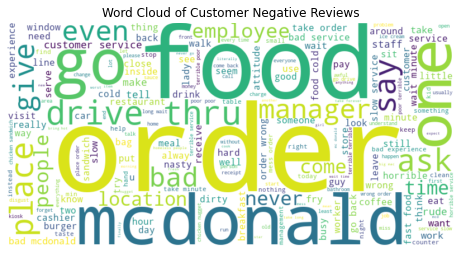

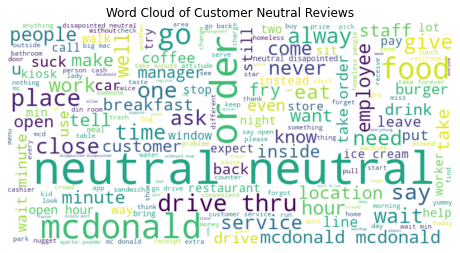

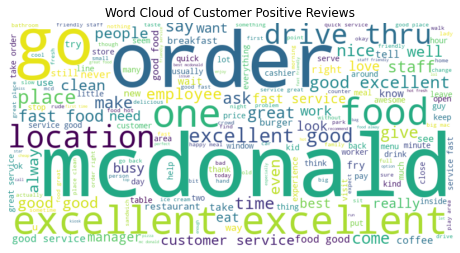

In [83]:
plot_wc(text_ne, "Negative")
plot_wc(text_neu, "Neutral")
plot_wc(text_pos, "Positive")

- Negative Sentiment: Customers often expressed dissatisfaction with aspects such as food quality, order accuracy, and service, highlighting concerns about bad experiences, employee behavior, and overall service quality.

- Neutral Sentiment: Neutral reviews typically revolved around the ordering process, with comments about the convenience of locations and wait times.

- Positive Sentiment: Positive sentiments focused on positive experiences with drive-through orders, food quality, and service quality. Cleanliness and great service were also noted.

### Geospatial Analysis

In [125]:
rating_df = df.groupby('store_address').mean().drop('reviewer_id', axis= 1).reset_index()
rating_df['Address'] = ' ' + rating_df['store_address']+'<br>Rating= ' + rating_df['rating'].round(2).astype(str)
rating_df.head()

store_address   latitude   longitude  \
0     1044 US-11, Champlain, NY 12919, United States  44.981410  -73.459820   
1  10451 Santa Monica Blvd, Los Angeles, CA 90025...  34.056593 -118.426000   
2  10901 Riverside Dr, North Hollywood, CA 91602,...  34.152507 -118.367904   
3  1100 N US Hwy 377, Roanoke, TX 76262, United S...  33.009318  -97.222925   
4  111 Madison St, Oak Park, IL 60302, United States  41.879656  -87.777913   

     rating                                            Address  
0  3.269355   1044 US-11, Champlain, NY 12919, United State...  
1  3.666667   10451 Santa Monica Blvd, Los Angeles, CA 9002...  
2  3.377193   10901 Riverside Dr, North Hollywood, CA 91602...  
3  3.465753   1100 N US Hwy 377, Roanoke, TX 76262, United ...  
4  3.362184   111 Madison St, Oak Park, IL 60302, United St...

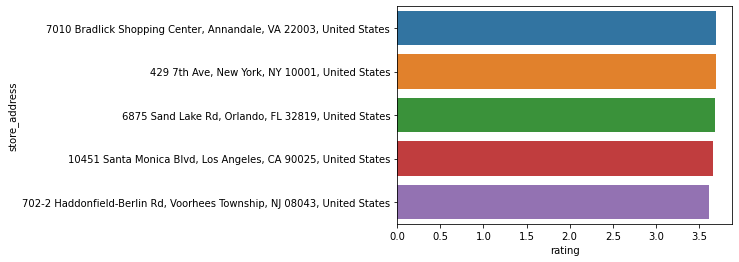

In [136]:
sns.barplot(data= rating_df.sort_values('rating', ascending= False).reset_index().head(), x='rating', y='store_address');

In [133]:
fig = px.density_mapbox(
    rating_df,
    lat='latitude',
    lon='longitude',
    z='rating',
    radius=10,
    center=dict(lat= average_rating_df.latitude.mean(),
                lon= average_rating_df.longitude.mean()),  
    zoom=3,  
    height= 600,
    mapbox_style='open-street-map',  
    title='McDonald\'s Store Ratings Density Map',
    hover_data={'Address': True, 'latitude': False, 'longitude': False, 'rating': False} 
)
fig.show()

<div id= "conclusion" style= "font-size: 22px; font-weight: bold">Conclusion and Future Work</div>

<a href= "#table-of-contents" style= "text-decoration: none; font-size: 14px">Back to Top</a>

### Conclusion
Our exploration into customer sentiments within McDonald's US store reviews has unveiled valuable insights into the perceptions and experiences of patrons at this renowned fast-food chain. Through a comprehensive analysis of the dataset, we have achieved the following key findings:
- Sentiment analysis: we have built 3 models using MultinomialNB, SVC, Random Forest, Decision Tree.
- Sentiment Insights: We have identified distinct patterns in customer sentiments. Negative reviews often highlight concerns about food quality, order accuracy, and service, while neutral reviews tend to focus on the ordering process and convenience. Positive sentiments revolve around drive-through orders, food quality, and exceptional service.
- Geospatial Analysis: By visualizing store locations and applying geospatial analysis techniques. This provides valuable insights into regional preferences and service quality.
- Data Visualization: Through effective data visualization, we have conveyed our findings with clarity and impact, using word clouds, charts, and graphs to communicate the most salient aspects of customer sentiment.

As we conclude this analysis, we recognize that these insights are not merely informative but actionable. McDonald's and other stakeholders have the opportunity to leverage this understanding to improve their services, enhance customer experiences, and ensure customer satisfaction.
### Future Work
- Deeper Sentiment Analysis: Future work could involve more advanced sentiment analysis techniques, such as aspect-based sentiment analysis, to gain finer-grained insights into specific areas of concern and praise within customer reviews.

<div id= "reference" style= "font-size: 22px; font-weight: bold">Reference</div>

<a href= "#table-of-contents" style= "text-decoration: none; font-size: 14px">Back to Top</a>

[1] Talking Points & Geographical Analyses by ANTHIME VALIN: <a href="https://www.kaggle.com/code/anthimevalin/talking-points-geographical-analyses/notebook">Link</a>\
[2] Reviews Sentiment Analysis || ML Predictive Model by SWAYAM PATIL: <a href="https://www.kaggle.com/code/swish9/reviews-sentiment-analysis-ml-predictive-model/notebook">Link</a>\
[3] NLTK: <a href="https://realpython.com/nltk-nlp-python/">Link</a>